# House Price Prediction:
### Goal:
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### For The Description of the Dataset

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

### Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
%matplotlib inline

### Read the Data

In [2]:
df = pd.read_csv("C:\\Users\\Mayar El-Mallah\\Downloads\\train.csv", index_col=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Information about the Data

In [3]:
print("The type of data=",type(df))
print("")
print("The dimensions of data=",df.ndim)
print("")
print("The shape of data=",df.shape)
print("")
print("The size of data=",df.size)
print("")
print("The columns of data=",df.columns)
print("")
print("The memory usage of each column= \n",df.memory_usage())

The type of data= <class 'pandas.core.frame.DataFrame'>

The dimensions of data= 2

The shape of data= (1460, 81)

The size of data= 118260

The columns of data= Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functi

In [4]:
print("The type of each feature:\n", df.dtypes.to_string())

The type of each feature:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int6

### Adjust the dtype

As there is a dtypes will cause errors if we dont use the right dtype for each feature


In [5]:
#dataframe = df.convert_dtypes()
#print(dataframe.dtypes)
dataframe=df

### Handling Missing Values

How many missing data points do we have?

In [6]:
# get the number of missing data points per column
missing_values_count = dataframe.isnull().sum()
# look at the # of missing points in the highest 6 columns
missing_values_count.sort_values( ascending=False)[0:6]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
dtype: int64

#### The percentage of the missing values before adjusting

In [7]:
# how many total missing values do we have?
total_cells = np.product(dataframe.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.889565364451209


### After the observation of the mission values: 
we will remove the highest 4 columns which are ["PoolQC", "MiscFeature", "Alley","Fence"      ] and we will refill the nan in the columns with the average value


In [8]:
dataframe=dataframe.drop(["PoolQC", "MiscFeature", "Alley","Fence"], axis=1)

In [9]:
dataframe = dataframe.fillna(dataframe.median())

C:\Users\MAYARE~1\AppData\Local\Temp/ipykernel_22852/3653611072.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe = dataframe.fillna(dataframe.median())


### The percentage of the missing values after handling

In [10]:
# how many total missing values do we have?
total_cells = np.product(dataframe.shape)
missing_values__count = dataframe.isnull().sum()
total_missing = missing_values__count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.076320939334638


### Data Description

In [11]:
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Mean and median are approximetly equal which means the curve is symmetric
* There is huge difference between 75% and max which means there  are outliers

## Check the outliers

In [12]:
df_num=[]
for col in df.columns:
    if df[col].dtypes == "Int64":
        df_num.append(col)
df_num

C:\Users\MAYARE~1\AppData\Local\Temp/ipykernel_22852/368863297.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if df[col].dtypes == "Int64":


['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

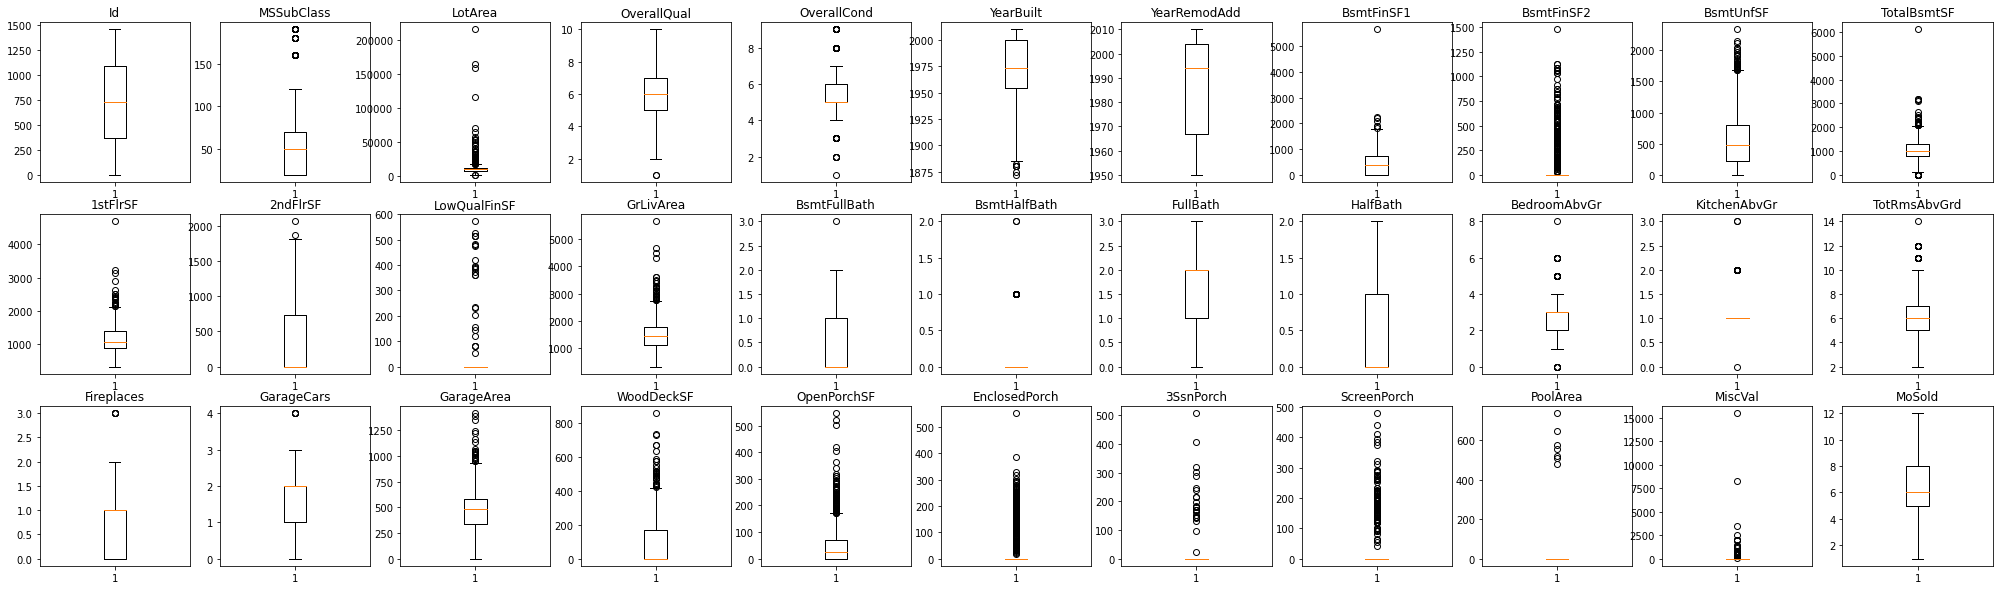

In [13]:
df_numeric = df[df_num]
fig, axs = plt.subplots(3, len(df_numeric.columns)//3, figsize=(len(df_numeric.columns), 10))

for ax, var in zip(axs.reshape(-1), df_numeric):
    ax.boxplot(x=df_numeric[var])
    ax.set_title(var)

* All of them have outliers

In [14]:
dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Check the Correlation for dependecy

<AxesSubplot:title={'center':'The Correlation between the Attributes'}>

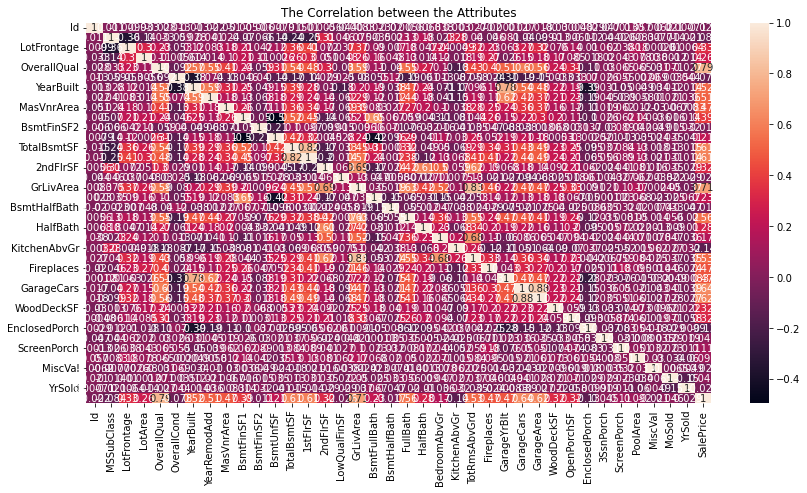

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("The Correlation between the Attributes")

sns.heatmap(dataframe.corr(), annot=True)

## Modeling and Evaluation

### One hot Encoding for categorical features

In [16]:
one_hot_encoded= pd.get_dummies(dataframe)
#one_hot_encoded = one_hot_encoded.fillna(one_hot_encoded.median())
print("The dtypes of the final data: \n",one_hot_encoded.dtypes)
print("\n The shape of one_hot_encoded",one_hot_encoded.shape)

The dtypes of the final data: 
 Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 277, dtype: object

 The shape of one_hot_encoded (1460, 277)


### Get X-train, y_train, X_test, y_test

In [17]:
X = one_hot_encoded.copy()
y= X.pop("SalePrice")
#add column of ones
X=np.hstack((X,np.ones((one_hot_encoded.shape[0],1))))

#split the data into train and test ::: learn how to use train test split from sklearn with test size = 0.1 and random state =42
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.10,random_state=42,shuffle=True)
print("The shape of y_train",y_train.shape)
print("The shape of x_train",x_train.shape)
print("The shape of y_test",y_test.shape)
print("The shape of x_test",x_test.shape)


The shape of y_train (1314,)
The shape of x_train (1314, 277)
The shape of y_test (146,)
The shape of x_test (146, 277)


In [18]:
#make the model black box that we learned
def train(x,y):
    w=(np.linalg.pinv(x.T@x)@x.T@y).T.reshape(-1)
    print(w.shape)
    return w

In [19]:
#make the predictor black box
def predict(x,w):
    y_pred = x @ w
    return y_pred

In [27]:
#compare y_pred you got with with y_test:::learn how to use mean absolute error from sklearn
w=train(x_train,y_train)

y_pred=predict(x_test,w)

print("The mean absolute percentage error:  ",mean_absolute_percentage_error(y_test, y_pred))
print("The mean absolute error:  ",np.mean(np.abs(y_test - y_pred)))
print("The Library of mean absolute error: ",mean_absolute_error(y_test,y_pred))


(277,)
The mean absolute percentage error:   0.1161364722803277
The mean absolute error:   19264.279307492656
The Library of mean absolute error:  19264.279307492656


In [28]:
def LinearRegressor(X_train,y_train,X_test,y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    # The mean squared error
    print("Mean squared error percentage: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
    print("The mean absolute error:  ",np.mean(np.abs(y_test - y_pred)))
    print("The Library of mean absolute error: ",mean_absolute_error(y_test,y_pred))


In [29]:
LinearRegressor(x_train,y_train,x_test,y_test)


Mean squared error percentage: 0.12
The mean absolute error:   19264.279490984787
The Library of mean absolute error:  19264.279490984783
